

# Diamond data cleaning




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading our data:

In [9]:
diamond = pd.read_csv('diamonds.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## The data at a glance:

In [12]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamond.shape

(53940, 10)

In [11]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [13]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization

We'll analyze the `Unit_Cost` column:

In [14]:
diamond['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [15]:
diamond['price'].mean()

3932.799721913237

In [57]:
diamond['price'].median()

2061.0

In [17]:
diamond['price'].std()

3989.439738146379

<Axes: >

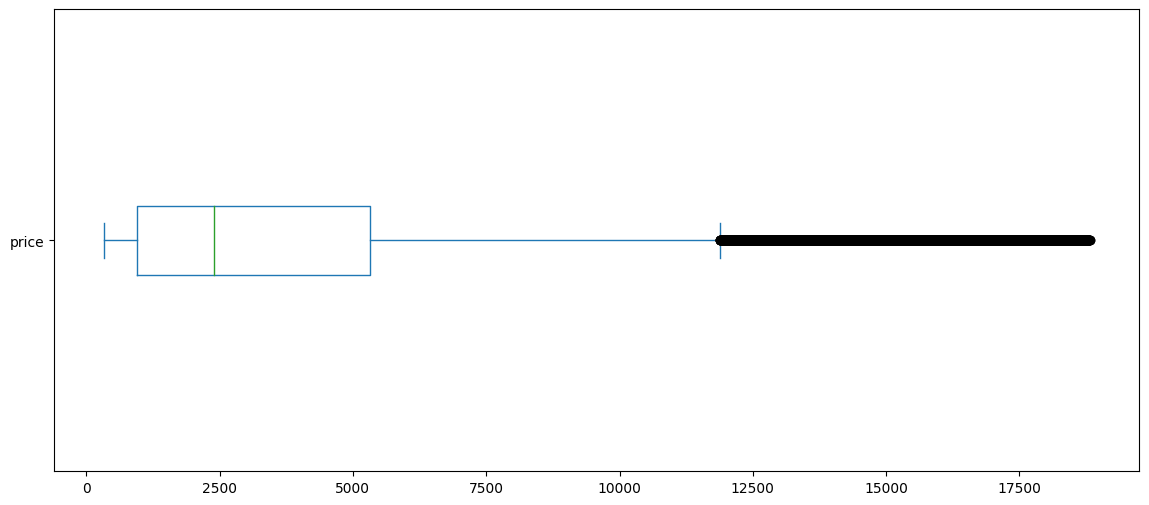

In [18]:
diamond['price'].plot(kind='box', vert=False, figsize=(14,6))

In [50]:
diamond = diamond[diamond['price'] <= 12500]

<Axes: >

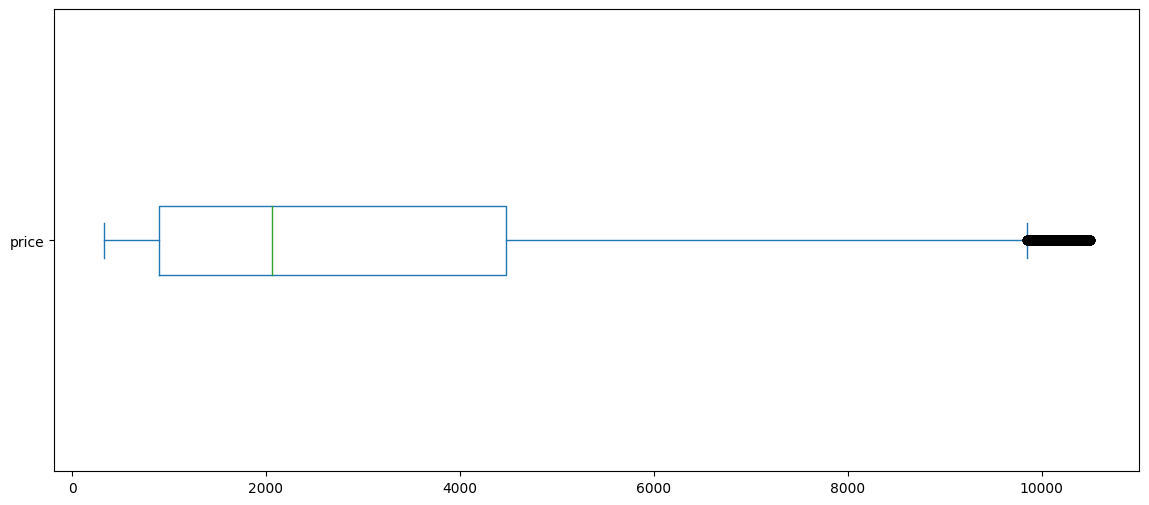

In [52]:
diamond['price'].plot(kind='box', vert=False, figsize=(14,6))

In [56]:
print(diamond['price'].mean())
print(diamond['price'].median())

2965.1733325204245
2061.0


<Axes: ylabel='Density'>

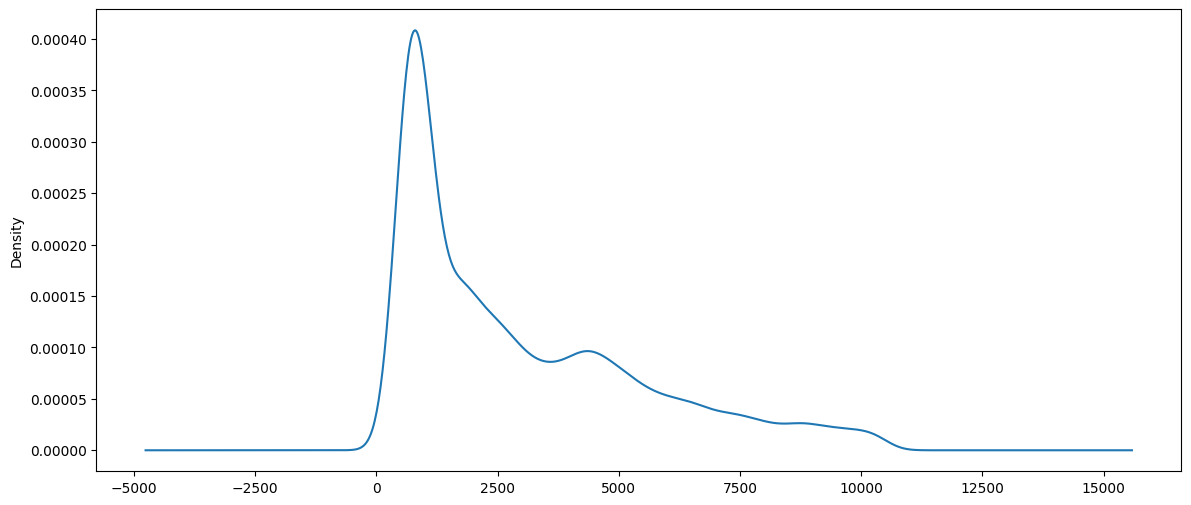

In [53]:
diamond['price'].plot(kind='density', figsize=(14,6)) # kde

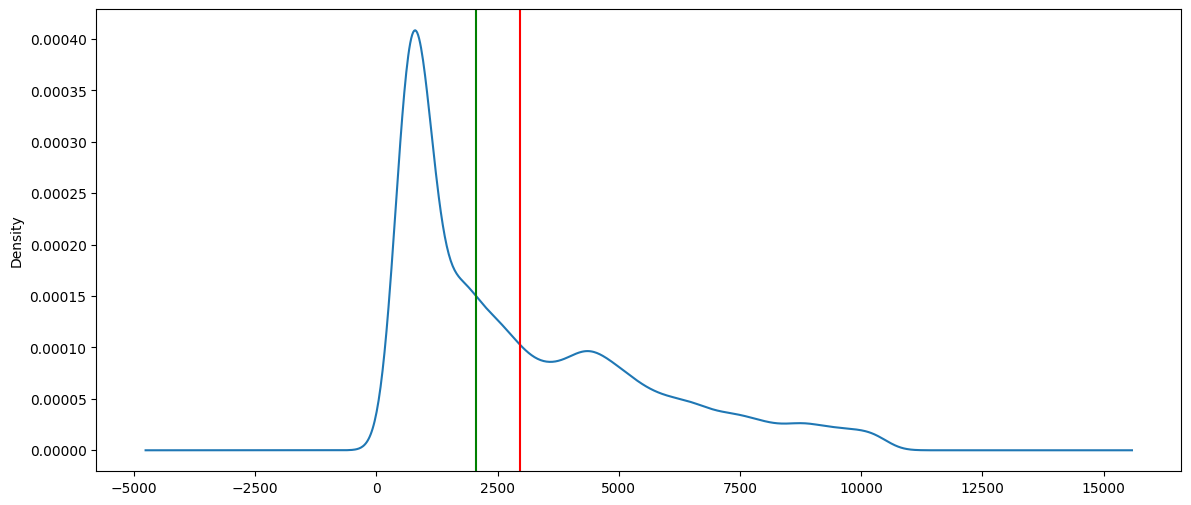

In [54]:
ax = diamond['price'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(diamond['price'].mean(), color='red')
ax.axvline(diamond['price'].median(), color='green')

Text(0.5, 0, 'dollars')

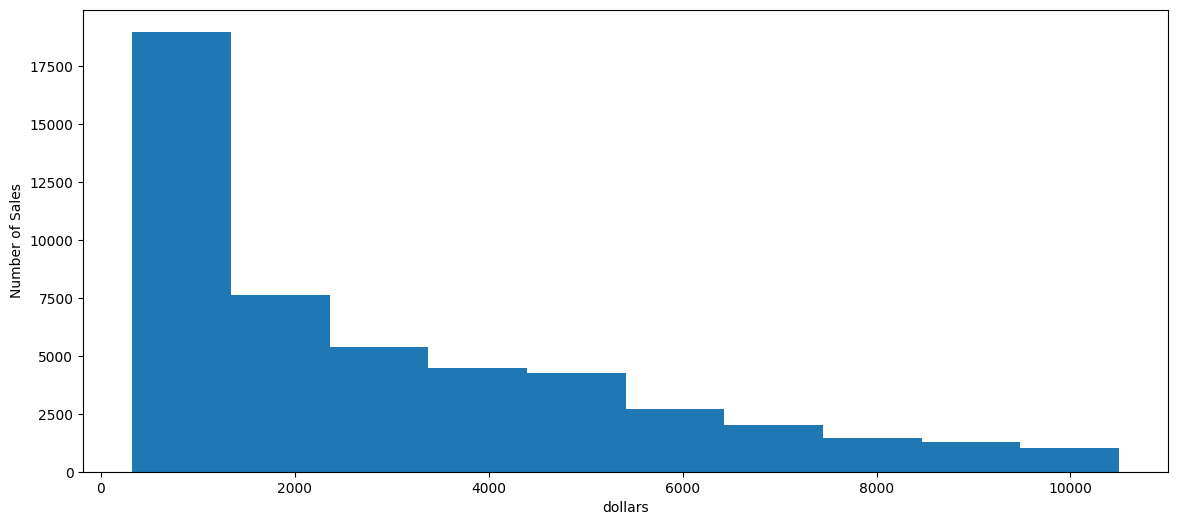

In [58]:
ax = diamond['price'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `cut` column:

In [22]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
diamond['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

<Axes: ylabel='count'>

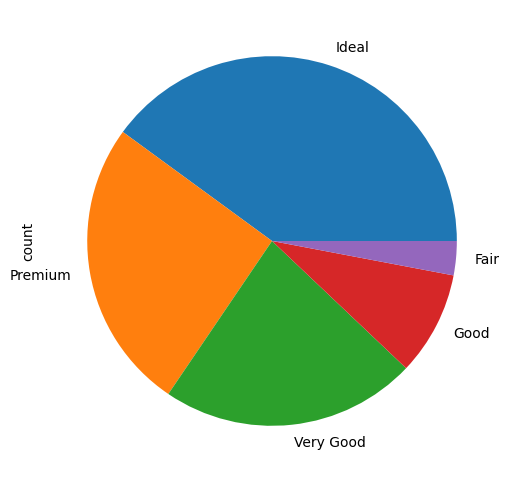

In [24]:
diamond['cut'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Diamonds')

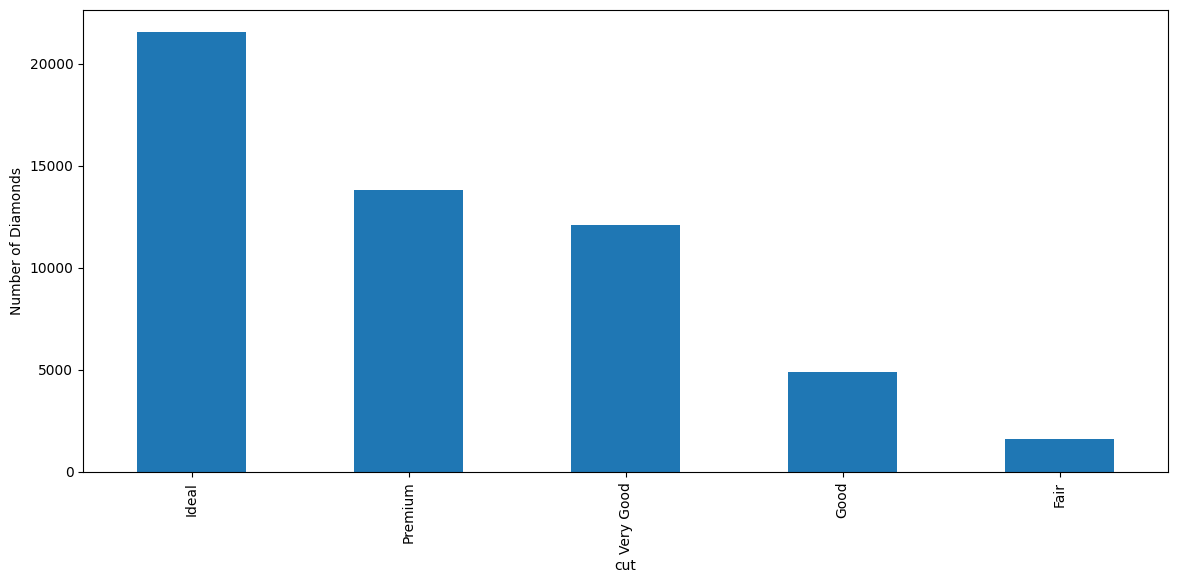

In [25]:
ax = diamond['cut'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Diamonds')

<Axes: xlabel='carat', ylabel='price'>

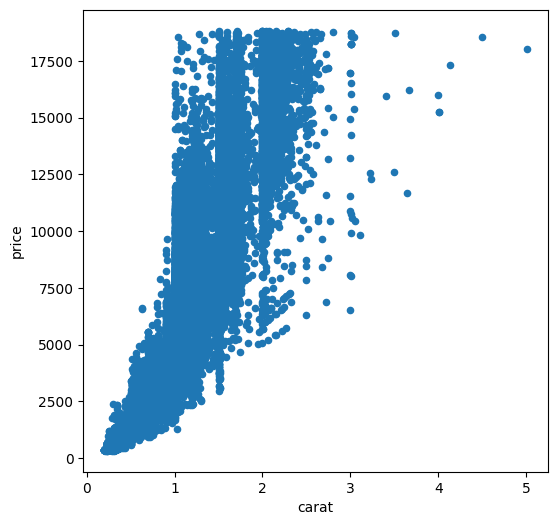

In [29]:
diamond.plot(kind='scatter', x='carat', y='price', figsize=(6,6))

In [61]:
diamond = diamond[diamond['carat'] < 3.0]

<Axes: xlabel='carat', ylabel='price'>

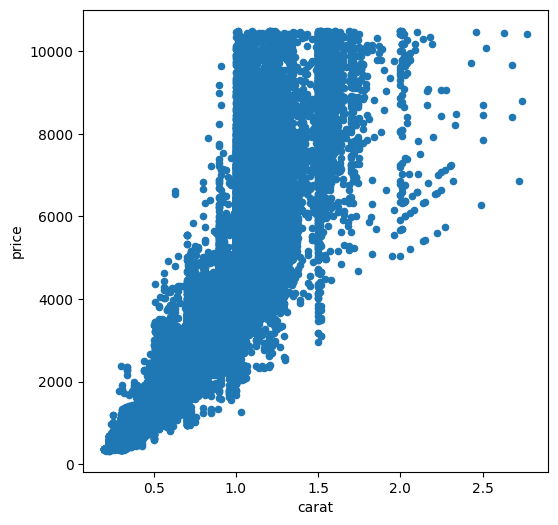

In [62]:
diamond.plot(kind='scatter', x='carat', y='price', figsize=(6,6))

Text(0, 0.5, 'Profit')

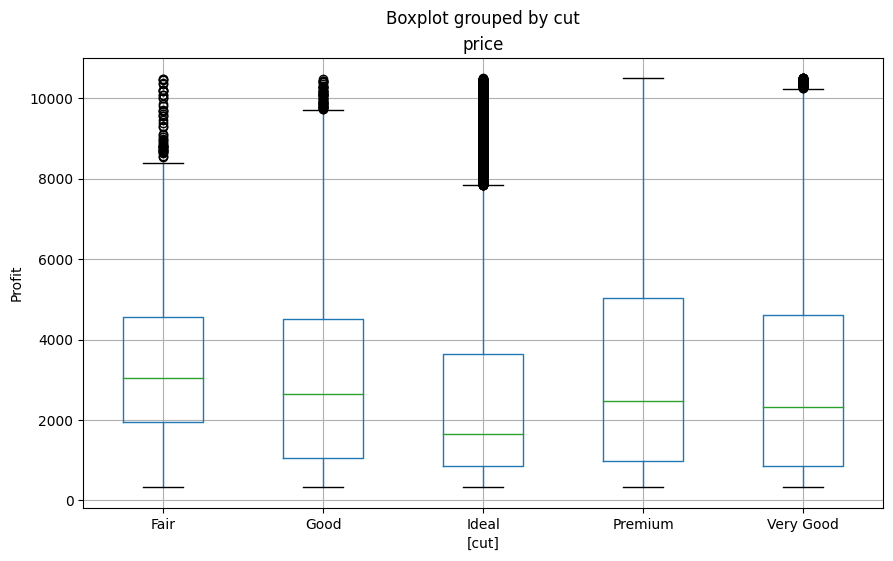

In [64]:
ax = diamond[['price', 'cut']].boxplot(by='cut', figsize=(10,6))
ax.set_ylabel('Profit')

carat       Axes(0.125,0.53;0.227941x0.35)
price    Axes(0.398529,0.53;0.227941x0.35)
dtype: object

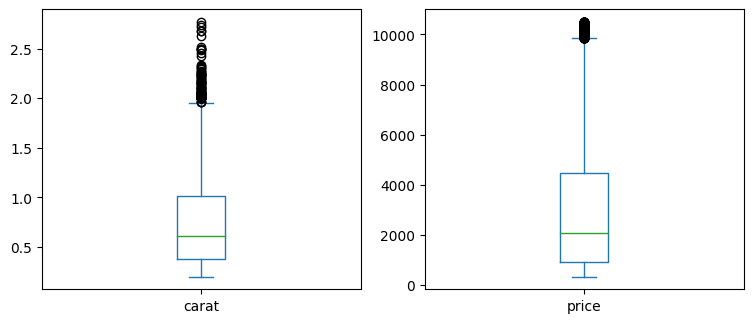

In [65]:
boxplot_cols = ['carat', 'price']

diamond[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)